In [36]:
from numpy import array
from numpy import split
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [51]:
# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# convert windows of weekly multivariate data into a series of total power
def to_series(data):
    # extract just the total power from each week
    series = [week[:, 0] for week in data]
    # flatten into a single series
    series = array(series).flatten()
    return series

def arima_forecast(history):
    # convert history into a univariate series
    series = to_series(history)
    # define the model
    model = ARIMA(series, order=(7,0,0))
    # fit the model
    model_fit = model.fit(disp=False)
    # make forecast
    yhat = model_fit.predict(len(series), len(series)+6)
    return yhat


In [23]:
# load the new file
dataset = read_csv('./../household_power_consumption.csv', header=0,
                    infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()

dataset = daily_data

In [25]:
# make dataset numeric
dataset = dataset.astype('float32')

#split dataset
train, test = split_dataset(dataset.values)

# convert data into weekly series
series = to_series(train)

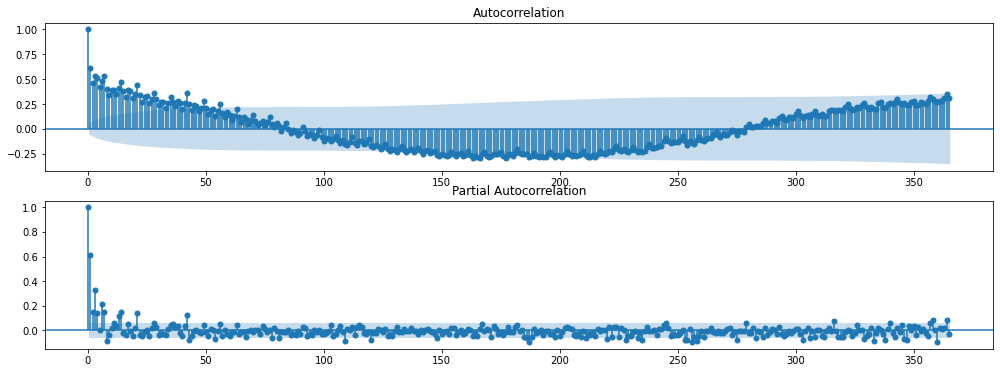

In [33]:
# plots
pyplot.figure(figsize=(17,6))
lags = 365

# Autocorrelation Function for 365 days of lag
axis = pyplot.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)

# Partial Autocorrelation Function for 365 days of lag
axis = pyplot.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)

# show plot
pyplot.show()

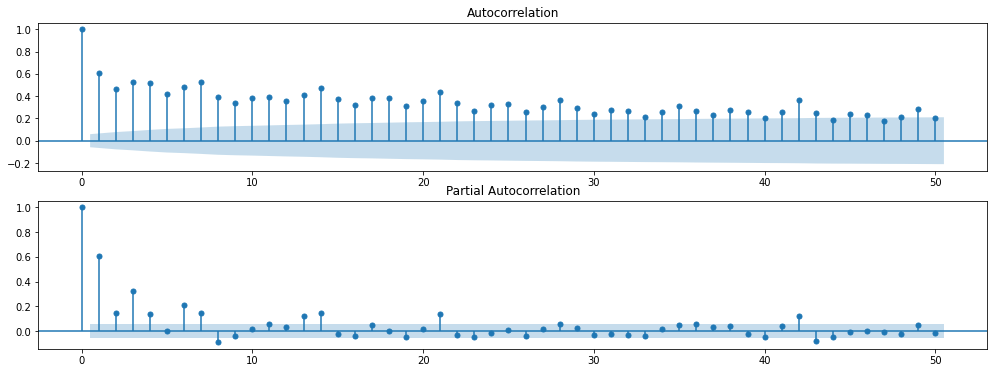

In [34]:
# plots
pyplot.figure(figsize=(17,6))
lags = 50

# Autocorrelation Function for 50 days of lag
axis = pyplot.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)

# Partial Autocorrelation Function for 50 days of lag
axis = pyplot.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)

# show plot
pyplot.show()

In [52]:
history = [x for x in train]
series = to_series(history)
model = ARIMA(series, order=(7,0,0))
model_fit = model.fit(disp=False)

yhat = model_fit.predict(len(series), len(series)+6)
print(yhat)

[1835.93935054 1780.21790646 1715.1357927  1908.95820353 1845.9832096
 1602.8053522  1632.2573438 ]
